# Data Story for Online Shopping Dataset

#### Import Neccessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone1/online_shoppers_intention.csv')
data.head()
df = data

#### Brief Description of the Dataset 

The dataset consists of 10 numerical and 8 categorical attributes. Thee 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for  each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that  page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

#### Goal of the Project 

Main Goal of the Project is to understand how the other variables can be used to determine whether an online shopping customer will make a purchase. We will explore the data using descriptive statistics to decide which variables are highly correlated with our outcome of interest (Revenue - T/F or Describe the Revenue by activity of the online shopper - Purchase or Browse). We will also use hypothesis tests to determine if a holiday/special day has a significant impact on wheter a customer will make a purchase or browse the website.Lastly, we will examine various ML algorithm and decide which method is the best in using the independent variables to predict whether a customer will make a purchase or not. 

#### Run descriptive analysis on Data

In [2]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


From this it is hard to tell which are are Categorical and Continuous

In [3]:
data['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

In [4]:
data['Informational'].value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64

In [5]:
data['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [6]:
data['ProductRelated'].value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
377      1
385      1
292      1
409      1
339      1
Name: ProductRelated, Length: 311, dtype: int64

#### CLASSIFACTION OF VARIABLES

Administrative - Categorical
Administrative_Duration - Continuous
Informational - Categorical 
Informational_Duration - Continuous
ProductRelated - Continuous
ProductRelated_Duration - Continuous
BounceRates - Continuous (Percentage)
ExitRates - Continuous (Percentage)
PageValues - Continuous
SpecialDay - Categorical 
Month - Categorical
OperatingSystems - Categorical
Browser - Categorical
Region - Categorical
TrafficType - Categorical
VisitorType - Categorical
Weekend - Categorical (Boolean)
Revenue - Categorical (Boolean)

In [7]:
# Convert Boolen Column to String Categorical Variable
daytype = {True : 'Weekend', False : 'Weekday'}
UserResult = {True: 'Purchase', False: 'Browse'}
data['Weekend'] = data['Weekend'].map(daytype)
data['Revenue'] = data['Revenue'].map(UserResult)

#### Number of Missing Values

In [8]:
# Count the number of Missing Values per column
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Split data Based on Outcome of Interest (Income)

In [9]:
# Split the data into 2 different groups of Revenue and examine the difference in the descriptive statistics
Purchase = data[data.Revenue == 'Purchase']
Browse = data[data.Revenue == 'Browse']
Purchase.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.929779,1.897042,2.407173,3.987140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
Browse.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000
mean,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392
std,3.202481,171.017970,1.211582,133.909306,40.744717,1803.797757,0.051877,0.051231,9.072424,0.209054,0.907835,1.681790,2.400493,4.032220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,151.000000,0.000000,0.015560,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,16.000000,510.190000,0.004255,0.028571,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,83.000000,0.000000,0.000000,35.000000,1331.816667,0.020000,0.053846,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000


The Bouce Rates for Customer's who are just Browsing is higher than Purchasing customers on average.  
Also, Browsing Customers visit less pages on average than Purchasing Customers. These are some insights 
we can gain from the descriptive statistics of the two groups of customers. Below we will examine the difference
between customer groups for categorical dependent variables.

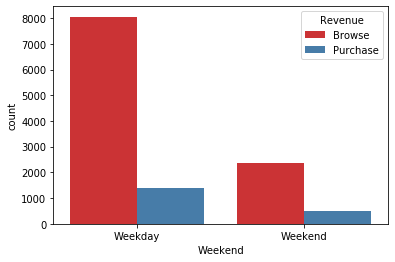

In [11]:
# Histograms to see the relationship between Categorical variables and outcome of interest (Revenue)
sns.countplot(x='Weekend', hue='Revenue', data=data, palette='Set1')


From above it seems that the ratio between browsing and and purchasing customers is lower on the weekend vs.
week days. Which means that there more browsing customers for every purchasing customer on the weekday when 
compared to the weekend.

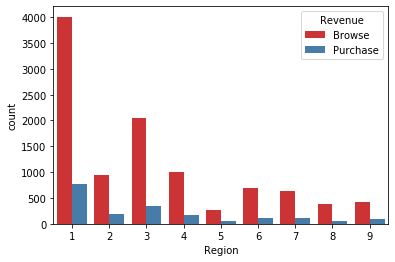

In [12]:
sns.countplot(x='Region', hue='Revenue', data=data, palette='Set1')

Based on the above plot we can say that Region 1 is probably the most technologically advanced region as 
it has the most customer activity. Aside from that there isn't much else we can conclude from the above plot.

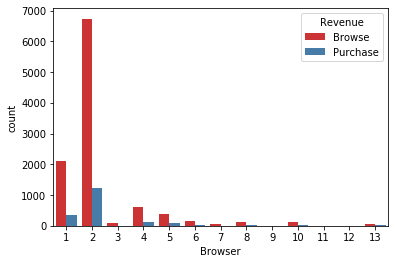

In [13]:
sns.countplot(x='Browser', hue='Revenue', data=data, palette='Set1')

Based on the above plot we can say that Browser 1 & 2 is probably are the most popular browsers being used 
the users on this online website. Aside from that there isn't much else we can conclude from the above plot.

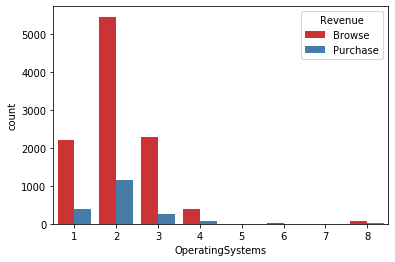

In [14]:
sns.countplot(x='OperatingSystems', hue='Revenue', data=data, palette='Set1')

Based on the above plot we can say that Operating Systems 1, 2, 3 and 4 are the most widely used. Based on
knowledge we can guess that those 4 operating systems include Windows, Linux, Apple IOS.

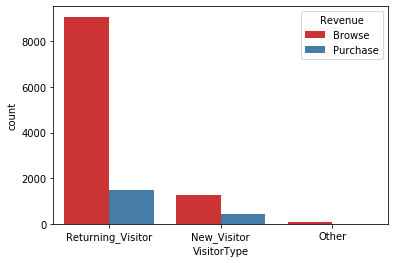

In [15]:
sns.countplot(x='VisitorType', hue='Revenue', data=data, palette='Set1')

Based on the above plot we notice that Returning Vistors Browse more per Purchase compared New Visitors.

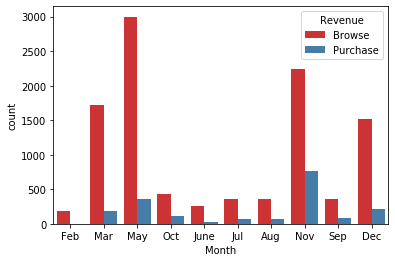

In [16]:
sns.countplot(x='Month', hue='Revenue', data=data, palette='Set1')

The above plot shows that most purchases per browsing customer happens in the months of November and December 
which is around Christmas time. Also there is an increase in activity in the month of May. 

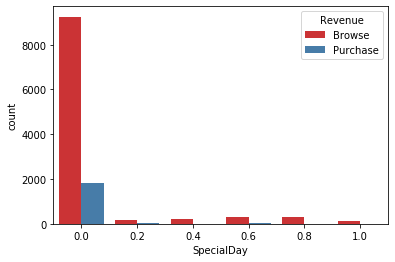

In [17]:
sns.countplot(x='SpecialDay', hue='Revenue', data=data, palette='Set1')

The above plot shows that on a Special Day there is both increased activity and purchases on the online website.

#### Scatter plot to see relationships between (Administrative, Administrative_Duration) and the outcome of interest ------ Revenue

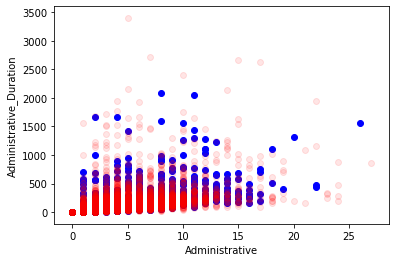

In [18]:
_ = plt.scatter(x= Purchase['Administrative'], y=Purchase['Administrative_Duration'], color='b')
_ = plt.scatter(x= Browse['Administrative'], y=Browse['Administrative_Duration'], color='r', alpha=0.1)
_ = plt.xlabel('Administrative')
_ = plt.ylabel('Administrative_Duration')
plt.show()

#### Scatter plot to see relationships between (Informational, Informational_Duration) and the outcome of interest ------ Revenue

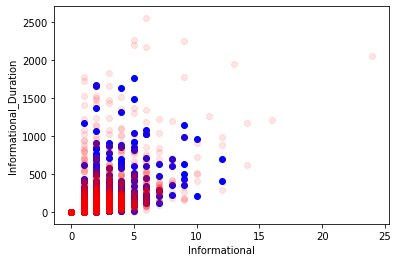

In [19]:
_ = plt.scatter(x= Purchase['Informational'], y=Purchase['Informational_Duration'], color='b')
_ = plt.scatter(x= Browse['Informational'], y=Browse['Informational_Duration'], color='r',alpha=0.1)
_ = plt.xlabel('Informational')
_ = plt.ylabel('Informational_Duration')
plt.show()

#### Scatter plot to see relationships between (ProductRelated, ProductRelated_Duration) and the outcome of interest ------ Revenue

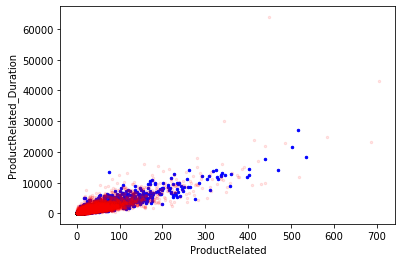

In [20]:
_ = plt.scatter(x= Purchase['ProductRelated'], y=Purchase['ProductRelated_Duration'], color='b',s=6)
_ = plt.scatter(x= Browse['ProductRelated'], y=Browse['ProductRelated_Duration'], color='r',s=6,alpha=0.1)
_ = plt.xlabel('ProductRelated')
_ = plt.ylabel('ProductRelated_Duration')
plt.show()

#### Boxplots to Determine the Difference in Customer Groups for the Continous Variables.

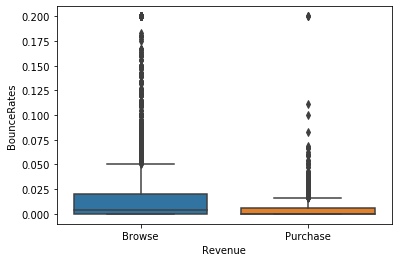

In [21]:
sns.boxplot(x='Revenue',y='BounceRates',data=data)

The box-plot futher solidifies our earlier observation that Browsing Customers tend to bounce between pages at a higher rate than Purchasing Customers.

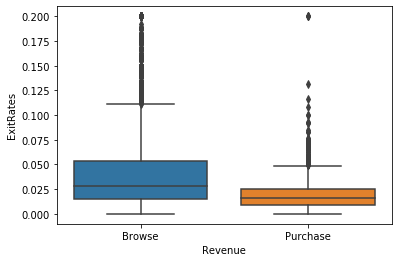

In [22]:
sns.boxplot(x='Revenue',y='ExitRates',data=data)

The avobe box-plot futher solidifies our earlier observation that Browsing Customers tend to exit the webpage higher rate than Purchasing Customers.

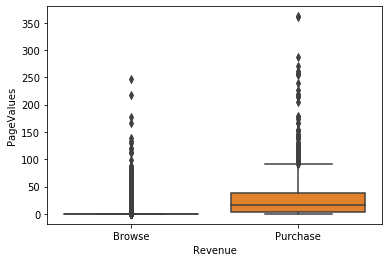

In [23]:
sns.boxplot(x='Revenue',y='PageValues',data=data)

The avobe box-plot futher solidifies our earlier observation that Browsing Customers tend to exit the webpage higher rate than Purchasing Customers.

#### Correlation Plots

Below we will look at both a pair plot which plots all the variable against each other and a heatmap to analyze the correlation between variables

In [24]:
#convert categorical variables into category data type (did not change orginal dataset)
data2 = data
data2['Month'] = data2['Month'].astype('category')
data2['VisitorType'] = data2['VisitorType'].astype('category')
data2['Weekend'] = data2['Weekend'].astype('category')
data2['Revenue'] = data2['Revenue'].astype('category')

In [25]:
data2['Weekend_num'] = data['Weekend'].cat.codes
data2['Revenue_num'] = data['Revenue'].cat.codes

In [26]:
data2['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [27]:
data2['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [1]:
sns.pairplot(data, hue='Revenue')

NameError: name 'sns' is not defined

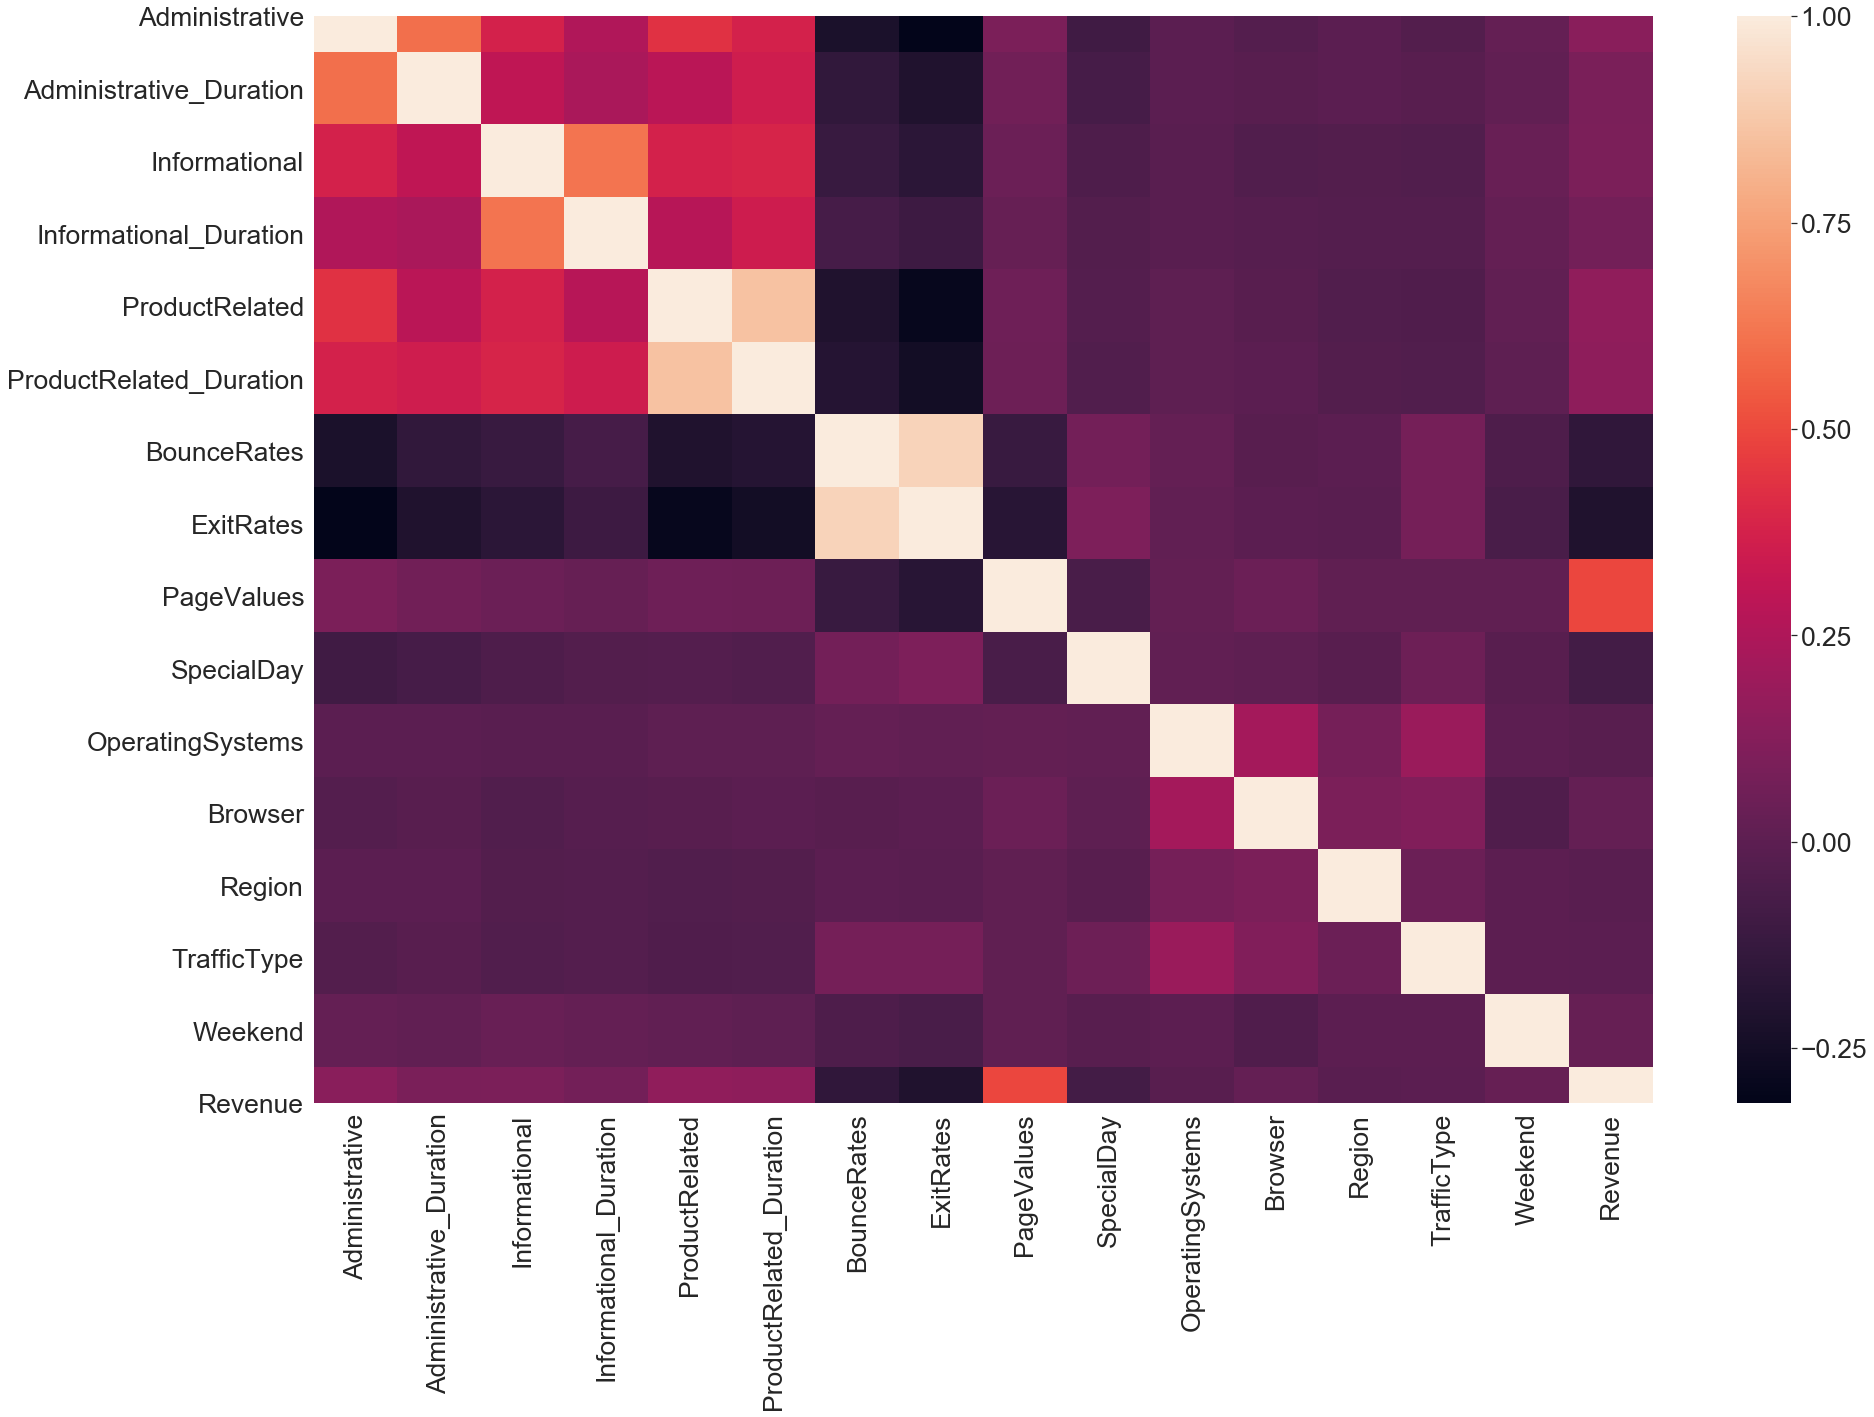

In [29]:
newdata = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone1/online_shoppers_intention.csv')
newdata.drop(['Month', 'VisitorType'], inplace=True, axis=1)
newdata.Weekend = newdata.Weekend.astype(int)
newdata.Revenue = newdata.Revenue.astype(int)
plt.figure(figsize = (30,20))
sns.set(font_scale=2.4)
sns.heatmap(newdata.corr())
plt.show()

Based on the above plots we can see that the page value rate is the most strongly correlated variable to the a customer purchasing on the website